### Pandas / Package

Pandas is the main package for working with `relational` or labeled data.  
It is built on '`top'` of NumPy package. [<u>more details</u>](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/)

In [41]:
# pip install pandas

import pandas as pd

### DataFrame

A DataFrame is a multi-dimensional `table` containing a collection of Series.  
A Pandas Series is like a `column` in a table.  
It is an one-dimensional array holding data of `any` type.

In [42]:
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2],
    'available': ['yes', 'no', 'yes', 'no'],
}

df = pd.DataFrame(data)
display(df)

,apples,oranges,available
0,3,0,yes
1,2,3,no
2,0,7,yes
3,1,2,no


### Read CSV

Import a comma-separated values (csv) file into a `DataFrame`.


In [43]:
df = pd.read_csv("_data/titanic.csv")
display(df.head())

print("Shape:", df.shape)
print("Columns:", df.columns)

,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


Shape: (1313, 6)
Columns: Index(['Name', 'PClass', 'Age', 'Sex', 'Survived', 'SexCode'], dtype='object')


### Location

Both `iloc` and loc are very useful during search and data cleaning.

In [44]:
display(df.iloc[1:4]) # 2nd to 4th row

# Select by index (name):
df = df.set_index(df['Name'])
display(df.loc['Allen, Miss Elisabeth Walton'])

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allison, Miss Helen Loraine",1st,2.0,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.0,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1


Name        Allen, Miss Elisabeth Walton
PClass                               1st
Age                                 29.0
Sex                               female
Survived                               1
SexCode                                1
Name: Allen, Miss Elisabeth Walton, dtype: object

### Conditional

Conditional selecting and `filtering` data are common tasks.

In [45]:
females = df[df['Sex'] == 'female']
males_60 = df[(df['Sex'] == 'male') & (df['Age'] >= 60)]

print("Females:", females.size)
display(females.head())

print("Males age 60+:", males_60.size)
display(males_60.head())

Females: 2772


,Name,PClass,Age,Sex,Survived,SexCode
Name,,,,,,
"Allen, Miss Elisabeth Walton","Allen, Miss Elisabeth Walton",1st,29.0,female,1,1
"Allison, Miss Helen Loraine","Allison, Miss Helen Loraine",1st,2.0,female,0,1
"Allison, Mrs Hudson JC (Bessie Waldo Daniels)","Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.0,female,0,1
"Andrews, Miss Kornelia Theodosia","Andrews, Miss Kornelia Theodosia",1st,63.0,female,1,1
"Appleton, Mrs Edward Dale (Charlotte Lamson)","Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.0,female,1,1


Males age 60+: 108


,Name,PClass,Age,Sex,Survived,SexCode
Name,,,,,,
"Artagaveytia, Mr Ramon","Artagaveytia, Mr Ramon",1st,71.0,male,0,0
"Crosby, Captain Edward Gifford","Crosby, Captain Edward Gifford",1st,70.0,male,0,0
"Fortune, Mr Mark","Fortune, Mr Mark",1st,64.0,male,0,0
"Frolicher-Stehli, Mr Maxmillian","Frolicher-Stehli, Mr Maxmillian",1st,60.0,male,1,0
"Goldschmidt, Mr George B","Goldschmidt, Mr George B",1st,71.0,male,0,0


### Replace

Replace accepts `regex` regular expressions.

In [46]:
# Replace female/male
df['Sex'] = df['Sex'].replace(['female', 'male'], ['Woman', 'Man'])
df['PClass'] = df['PClass'].replace(r'1st', 'First', regex=True)
display(df.head())

,Name,PClass,Age,Sex,Survived,SexCode
Name,,,,,,
"Allen, Miss Elisabeth Walton","Allen, Miss Elisabeth Walton",First,29.00,Woman,1,1
"Allison, Miss Helen Loraine","Allison, Miss Helen Loraine",First,2.00,Woman,0,1
"Allison, Mr Hudson Joshua Creighton","Allison, Mr Hudson Joshua Creighton",First,30.00,Man,0,0
"Allison, Mrs Hudson JC (Bessie Waldo Daniels)","Allison, Mrs Hudson JC (Bessie Waldo Daniels)",First,25.00,Woman,0,1
"Allison, Master Hudson Trevor","Allison, Master Hudson Trevor",First,0.92,Man,1,0


### Statistics

Pandas has multiple `built-in methods` for descriptive statistics.

In [47]:
# Statistics (by Age)
A = pd.DataFrame()
A['max'] = [df['Age'].max()]
A['min'] = [df['Age'].min()]
A['avg'] = [df['Age'].mean()]
display(A)

# Value counts (by PClass)
A = pd.DataFrame()
A['PClass'] = df['PClass'].value_counts()
display(A)

# Unique values (by Sex)
A = pd.DataFrame()
A['unique_value'] = df['Sex'].unique()
A['total'] = [df['Sex'].value_counts()[0], df['Sex'].value_counts()[1]]
display(A)

# Missing values (by Agge)
A = pd.DataFrame()
A = df[df['Age'].isnull()]

print("Missing values (Age):", A.size)
display(A.head())


,max,min,avg
0,71.0,0.17,30.397989


,PClass
3rd,711
First,322
2nd,279
*,1


,unique_value,total
0,Woman,851
1,Man,462


Missing values (Age): 3342


,Name,PClass,Age,Sex,Survived,SexCode
Name,,,,,,
"Aubert, Mrs Leontine Pauline","Aubert, Mrs Leontine Pauline",First,NaN,Woman,1,1
"Barkworth, Mr Algernon H","Barkworth, Mr Algernon H",First,NaN,Man,1,0
"Baumann, Mr John D","Baumann, Mr John D",First,NaN,Man,0,0
"Borebank, Mr John James","Borebank, Mr John James",First,NaN,Man,0,0
"Bradley, Mr George","Bradley, Mr George",First,NaN,Man,1,0


### GroupBy

Groupby is one of the `most powerful` feature in pandas.

In [48]:
A = df.groupby('Sex').count()
display(A)

A = df.groupby('Sex').mean(numeric_only=True)
display(A)

A = df.groupby('Sex')['Survived'].count()
display(A)

A = df.groupby(['Sex', 'Survived']).mean(numeric_only=True)
display(A)

,Name,PClass,Age,Survived,SexCode
Sex,,,,,
Man,851,851,468,851,851
Woman,462,462,288,462,462


,Age,Survived,SexCode
Sex,,,
Man,31.014338,0.166863,0.0
Woman,29.396424,0.666667,1.0


Sex
Man      851
Woman    462
Name: Survived, dtype: int64

Age  SexCode
Sex   Survived                    
Man   0         32.320780      0.0
      1         25.951875      0.0
Woman 0         24.901408      1.0
      1         30.867143      1.0

### Plotting

Pandas `integrates` with Matplotlib, so we can directly plot DataFrames.

<AxesSubplot: title={'center': 'Age'}, xlabel='Age', ylabel='Frequency'>

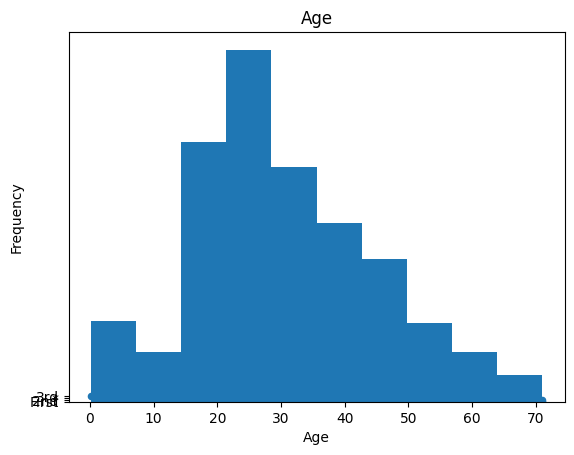

In [49]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Age', y='PClass')
df['Age'].plot(kind='hist', title='Age')
